# Introduction to NumPy

We'll import:
1. NumPy for the tensor work
2. Matplotlib for visualizations
3. The time module for timing operations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

%matplotlib inline

# Multidimensional Arrays

From an introductory CS course or from personal experience you may have seen arrays that look like this,

$$[1, 2, 3, 4, 5]$$

Or even 2-D arrays like this,

$$ [[1, 2, 3],\\
     \:[4, 5, 6],\\
     \:[7, 8, 9]] $$

But what about a 3-D, 4-D, or N-D array?

$$[[[1, 2],\\
  \;\;\;[3, 4]],\\
  \:[[5, 6],\\
  \;\;\;[7, 8]]]$$


Turns out we can create these types of arrays in native Python, but they are hard to visualize and we will soon see that NumPy is a much more powerful tool for dealing with these high dimensional arrays also known as **tensors**.

In [2]:
# a 2-D array in python
a = [[1,2], [3,4]]
print(a, '\n')

# a 2-D array in numpy
b = np.array(a)
print(b)

[[1, 2], [3, 4]] 

[[1 2]
 [3 4]]


In [3]:
# a 3-D array in python
c = [[[1,2], [3,4]], [[5,6], [7,8]]]
print(c, '\n')


# a 3-D array in numpy
d = np.array(c)
print(d)

[[[1, 2], [3, 4]], [[5, 6], [7, 8]]] 

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


### So what's the difference?

Visually, we can see that the np.array object can take in a python array as an argument and that it prints out the array in a nicer manner.

However, the np.array object is actually just one way to create the more fundamental **np.ndarray** base type.

There are several properties of an np.ndarray, there are some important ones:
1. Dimension (rank) - how many dimensions a tensor has
2. Shape - The sizes of each dimension
3. Data type - The kind of data a tensor holds

In [4]:
# lets print out some attributes of the ndarray d, from above
print(d.ndim)
print(d.shape)
print(d.dtype)

3
(2, 2, 2)
int64


# Array Indexing

Now we're faced with the question - how do we read the data held in a tensor?

Let's try to access the data in the array from above:

In [5]:
# individual elements
print(d[0][1][1])
print(d[0, 1, 1], '\n')

# individual dimensions
print(d[:, 0, 0])
print(d[0, :, 0])
print(d[0, 0, :], '\n')

# multiple dimensions
print(d[:, :, 0])
print(d[0, :, :])
print(d[:, 0, :])

4
4 

[1 5]
[1 3]
[1 2] 

[[1 3]
 [5 7]]
[[1 2]
 [3 4]]
[[1 2]
 [5 6]]


For the first time, this high dimensional indexing can be hard to wrap your head around. Most of the time, you won't be able to visualize indexing tensors higher than 3-D but you get better with more practice!

Question: What does this line do?

In [6]:
print(d[:, :, :])

[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]]


# Vectorization

Vectorization is what makes NumPy and other linear algebra libraries so powerful. In short, vectorization is ability to perform computation in parallel.

Let's start with a simple example:

In [8]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8])
b = np.array([2, 3, 4, 5, 6, 7, 8, 9])


(array([1, 2, 3, 4, 5, 6, 7, 8]), array([2, 3, 4, 5, 6, 7, 8, 9]))

How do we perform the operation $a + b$?


In [9]:
# python for-loop way
start = time.time()
ans_loop = []
for i, j in zip(a, b):
    ans_loop.append(i + j)
end = time.time() - start

print(f"Time taken: {end}")
print(ans_loop)

Time taken: 0.0003032684326171875
[3, 5, 7, 9, 11, 13, 15, 17]


In [10]:
# numpy vectorized way
start = time.time()
ans_vec = a + b
end = time.time() - start

print(f"Time taken: {end}")
print(ans_vec)

Time taken: 0.00013136863708496094
[ 3  5  7  9 11 13 15 17]


Both methods produce the correct answer! The NumPy method is faster but not much faster for this example. What happens if we scale the problem up...

In [11]:
a = np.arange(1e5)
b = np.arange(1e5)

In [13]:
# python for-loop way
start = time.time()
ans_loop = []
for i, j in zip(a, b):
    ans_loop.append(i + j)
end = time.time() - start

print(f"Time taken - for loop: {end}")

# numpy vectorized way
start = time.time()
ans_vec = a + b
end = time.time() - start

print(f"Time taken - vectorized: {end}")

Time taken - for loop: 0.05412125587463379
Time taken - vectorized: 0.0008661746978759766


Here we can really see the power of vectorization... and the great thing about this is that it applies to any numpy supported operations ($+, -, *, **, /, //$), **and** any function:

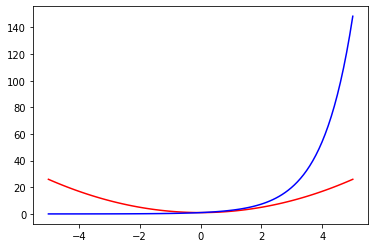

In [16]:
# domain
x = np.linspace(-5, 5, 100)

# custom function
def f(x): return x**2 + 1
    
plt.figure()
plt.plot(x, f(x), '-r')
plt.plot(x, np.exp(x), '-b')
plt.show()

# Random Sampling

Random sampling is important because it is **very** prevelant and important in machine learning and numerical computing in general. 

Luckily NumPy has a random sampling module! [NumPy Random Docs](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html)

In [14]:
# sampling arbitrary random vectors from a uniform distribution
randvec = np.random.rand(3,4)
print(randvec)

[[0.11579283 0.80571476 0.09141702 0.23012887]
 [0.2271166  0.4042518  0.68550067 0.16873698]
 [0.82896156 0.89173929 0.14118314 0.54036497]]


In [17]:
a = np.arange(10)

# shuffling elements of an array
np.random.shuffle(a)
print(a, '\n')

# picking elements randomly from an array
randelems1 = np.random.choice(a)
randelems2 = np.random.choice(a, 3)
randelems3 = np.random.choice(a, 3, replace=False)

print(randelems1)
print(randelems2)
print(randelems3)

[1 6 3 8 9 5 7 2 0 4] 

8
[3 8 2]
[6 3 1]


In [18]:
# sampling random integers within a range
randints = np.random.randint(1, 9, size=(2,2))
print(randints)

[[1 7]
 [1 8]]
